## NNDL LAB Program Lists - Lab#02


### Lab#2: Implementation of ADALINE Network

### Program #1: Implement the classification of OR problem using ADALINE network

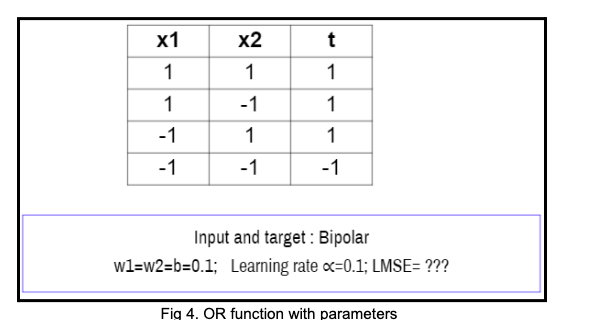

In [56]:
import numpy as np
import pandas as pd

In [173]:
class Adaline():
    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
        
    ## FOrdward pass
    ##matmul - matrix multiplication
    def fit(self, X, y):
        self.weights =  np.zeros(1+X.shape[1])
        self.loss = []
        ##iteration over the epochs
        for i in range(self.epochs):
            y_hat = self.net_input(X)
            print(f"X with baises:{y_hat}")
            print("--"*10)
            print(f"for each epochs >> {i + 1}")
            print("--"*10)
            errors = (y - y_hat)
            print(f"error: {errors}")
            self.weights[1:] += self.eta * X.T.dot(errors)
            print(f"##"*10)
            self.weights[0] += self.eta*errors.sum()
            loss = (errors**2).sum() / 2
            print(f"updated weights after epoch: {i + 1}/{self.epochs}: \n{self.weights}")
            self.loss.append(loss)
        return self
    def net_input(self, X):
        """Calculate the net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]
    ##Define the activation function
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        #retun the labels after the unit
        return np.where(self.activation(X)>= 0.0, 1, -1)
        
        


In [174]:
OR = {
    "x1" : [-1,-1,1,1],
    "x2" : [-1,1,-1,1],
    "y" : [-1,1,1,1]
}
##converting dict into dataframe
data_OR = pd.DataFrame(OR)

In [175]:
## Prepare the data
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis = 1)
    y = df[target_col]
    
    return X, y


In [176]:
X, y = prepare_data(data_OR)

In [177]:
X

,x1,x2
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [178]:
y

0   -1
1    1
2    1
3    1
Name: y, dtype: int64

In [179]:
ETA = 1
EPOCHS = 5
model = Adaline(eta = ETA, epochs = EPOCHS )

In [180]:
model.fit(X, y)

X with baises:[0. 0. 0. 0.]
--------------------
for each epochs >> 1
--------------------
error: 0   -1.0
1    1.0
2    1.0
3    1.0
Name: y, dtype: float64
####################
updated weights after epoch: 1/5: 
[2. 2. 2.]
X with baises:[-2.  2.  2.  6.]
--------------------
for each epochs >> 2
--------------------
error: 0    1.0
1   -1.0
2   -1.0
3   -5.0
Name: y, dtype: float64
####################
updated weights after epoch: 2/5: 
[-4. -4. -4.]
X with baises:[  4.  -4.  -4. -12.]
--------------------
for each epochs >> 3
--------------------
error: 0    -5.0
1     5.0
2     5.0
3    13.0
Name: y, dtype: float64
####################
updated weights after epoch: 3/5: 
[14. 14. 14.]
X with baises:[-14.  14.  14.  42.]
--------------------
for each epochs >> 4
--------------------
error: 0    13.0
1   -13.0
2   -13.0
3   -41.0
Name: y, dtype: float64
####################
updated weights after epoch: 4/5: 
[-40. -40. -40.]
X with baises:[  40.  -40.  -40. -120.]
--------------------

In [181]:
model.predict(X)

array([-1,  1,  1,  1])

#  Implement the classification of XOR problem using MADALINE network

In [189]:
##Activation function
def activation_function(z):
    res = []
    for i in range(z):
        if z[i] >= 0:
            res.append(1)
        else:
            res.append(-1)

In [190]:
##input the Data
def net_input(X, w, bais):
    res = np.dot(w,x)+bais
    return res

In [215]:
class Madaline():
    ##Initialization learing rate and epochs
    def __init__(self, learing_rate, epochs):
        self.learing_rate = learing_rate
        self.epochs = epochs
    ## Define the activation functon
    def activation_function(z):
        res = []
        for i in range(z):
            if z[i] >= 0:
                res.append(1)
            else:
                res.append(-1)
                
    ##Transforimmgin the X and y
    def fit(self, X, y):
        self.weights =  np.zeros(1+X.shape[1])
        for epoch in range(epochs):
            self.loss = []
            for i in range(len(X)):
                
                z = net_input(X[i], w1, bais1)
                y_in = np.dot(w2, activation_function(z)) + bais2
                if y_in >=0:
                    out_pred = 1
                else:
                    out_pred = -1
                errors = y[i] - out_pred
                if errors != 0 and y[i]==1:
                ##np.argmin return index with minimum value
                #print(errors)
                    idx = np.argmin(abs(z))
                #print(idx)
                    v1 = learing_rate * X[i][0]*(1-z[idx])
                    v2 = learing_rate * X[i][1]*(1-z[idx])
                    v = np.zeroes((len(w1),2))
                    v[idx,0] = v1
                    v[idx,1] = v2
                    w1 = w1+v
                    bias1[idx] = bias[idx] + learing_rate*(1-z[idx])
                if errors !=0 and y[i]==-1:
                    for i in range(len(z)):
                        v1 = learing_rate * X[i][0]*(-1-z[idx])
                        v2 = learing_rate * X[i][1]*(-1-z[idx])
                        v = np.zeros(len(w1),2)
                        v[i,0] = v1
                        v[i,1] = v2
                        w1 = w1 + p
                        bais1[i] = bais1[i] + learing_rate*(-1-z[i])
                loss = loss+(errors**2)/2
                loss.append(loss)
            return w1, bais1, loss
                
            

In [216]:
XOR = {
    "x1" : [-1,-1,1,1],
    "x2" : [-1,1,-1,1],
    "y" : [-1,1,1,-1]
}

df_XOR  =pd.DataFrame(XOR)

In [217]:
## Prepare the data
def prepare_data(df, target_col = "y"):
    X = df.drop(target_col, axis = 1)
    y = df[target_col]
    
    return X, y


X, y = prepare_data(df_XOR)

In [218]:
X

,x1,x2
0,-1,-1
1,-1,1
2,1,-1
3,1,1


In [219]:
y

0   -1
1    1
2    1
3   -1
Name: y, dtype: int64

In [222]:
learing_rate = 1
EPOCHS = 5
model = Madaline(learing_rate = ETA, epochs = EPOCHS )

In [224]:
model.fit(X,y)

KeyError: 0